In [2]:
import cv2
import time
import skvideo.io
import numpy as np
from matplotlib import pyplot as plt

from classes.video import Video

In [3]:
fb_params = dict(pyr_scale=0.5,
                 levels=3,
                 winsize=15,
                 iterations=3,
                 poly_n=5,
                 poly_sigma=1.2,
                 flags=0)

In [4]:
path = "videos/test/182.mp4"
# path = "videos/0/0.mp4"
# path = "videos/test/7857.mp4"
video = Video(path)
video.check()
video.init_frames(sample_time_interval=0.125)

[META] Scikit-Video 182.mp4 1280x720 50fps h264
[META] Scikit-Video video-6mji8JlpgU.mp4 1280x720 50fps h264


In [10]:
def show_flow(flow, prev_frame, cur_frame):
    mag, ang = cv2.cartToPolar(flow[..., 0], flow[..., 1])
    (height, width) = prev_frame.shape
    hsv = np.zeros((height, width, 3), dtype=np.uint8)
    hsv[..., 0] = ang * 180 / np.pi / 2
    hsv[..., 1] = 255
    hsv[..., 2] = cv2.normalize(mag, None, 0, 255, cv2.NORM_MINMAX)
    bgr = cv2.cvtColor(hsv, cv2.COLOR_HSV2RGB)
#     plt.figure(figsize=(12,4))
#     ax1 = plt.subplot(1,3,3)
#     plt.sca(ax1)
    plt.imshow(bgr)
#     ax2 = plt.subplot(1,3,1)
#     plt.sca(ax2)
#     plt.imshow(prev_frame, cmap ='gray')
#     ax3 = plt.subplot(1,3,2)
#     plt.sca(ax3)
#     plt.imshow(cur_frame, cmap ='gray')
    plt.show()

def show_flow_ext(flow_ext):
    mag, ang = cv2.cartToPolar(flow_ext[..., 0], flow_ext[..., 1])
    (height, width, _) = flow_ext.shape
    hsv = np.zeros((height, width, 3), dtype=np.uint8)
    hsv[..., 0] = ang * 180 / np.pi / 2
    hsv[..., 1] = 255
    hsv[..., 2] = cv2.normalize(mag, None, 0, 255, cv2.NORM_MINMAX)
    bgr = cv2.cvtColor(hsv, cv2.COLOR_HSV2RGB)
    plt.imshow(bgr)
    plt.show()

In [6]:
def resize_frame(frame, target_width=0, target_height=0):
    (height, width) = frame.shape
    if target_width == 0 and target_height == 0:
        return frame
    elif target_width == 0:
        target_width = int(width * target_height / height)
    elif target_height == 0:
        target_height = int(height * target_width / width)
    print(height, width, target_height, target_width)
    return cv2.resize(frame, (target_width, target_height), interpolation=cv2.INTER_AREA)

In [7]:
from skimage.measure import block_reduce
import math

def flow_extraction(flow, height_grid_num=12):
    (height, width, vector) = flow.shape
    grid_height = int(height / height_grid_num)
    grid_width = grid_height
    width_grid_num = math.ceil(width / grid_width)
    grid_width = int(width / width_grid_num)
    print(grid_height, grid_width, height_grid_num, width_grid_num)
    flow_ext = block_reduce(flow, block_size=(grid_height, grid_width, 1), func=np.mean)
#     plt.plot(flow_ext[..., 0], flow_ext[..., 1], 'o', color='b')
#     plt.show()
#     flow_ext = np.zeros((height_grid_num, width_grid_num, vector), dtype=flow.dtype)
#     for i in range(height):
#         for j in range(width):
#             fi = int(i / grid_height)
#             fj = int(j / grid_width)
#             if fi >= height_grid_num or fj >= width_grid_num:
#                 continue
#             flow_ext[fi, fj] += flow[i, j]
#     flow_ext /= grid_width * grid_height
#     plt.plot(flow_ext[..., 0], flow_ext[..., 1], 'o', color='b')
#     plt.show()
    return flow_ext

720 1280 720 1280
60 58 12 22
720 1280 720 1280
6
60 58 12 22


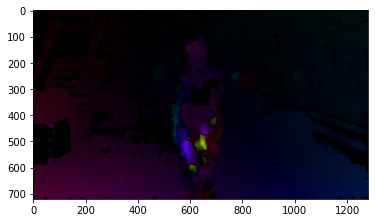

720 1280 720 1280
12
60 58 12 22


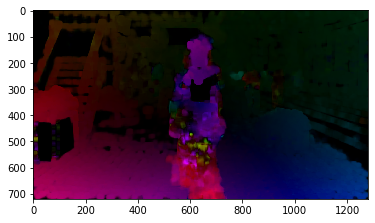

720 1280 720 1280
19
60 58 12 22


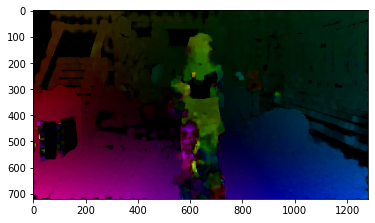

720 1280 720 1280
25
60 58 12 22


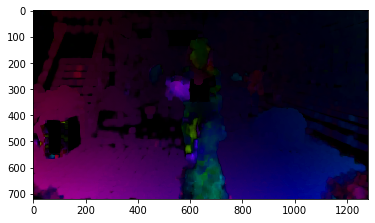

720 1280 720 1280
31
60 58 12 22


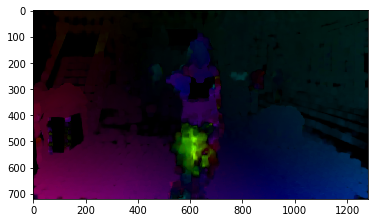

720 1280 720 1280
38
60 58 12 22


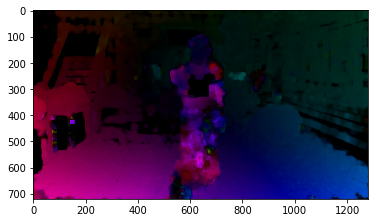

720 1280 720 1280
44
60 58 12 22


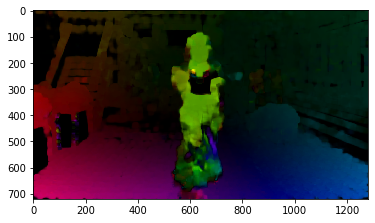

720 1280 720 1280
50
60 58 12 22


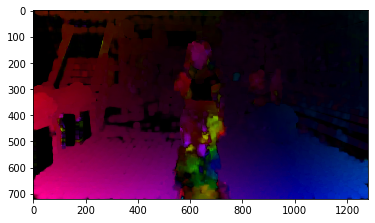

720 1280 720 1280
56
60 58 12 22


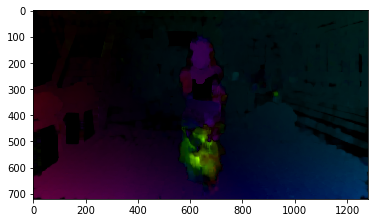

720 1280 720 1280
62
60 58 12 22


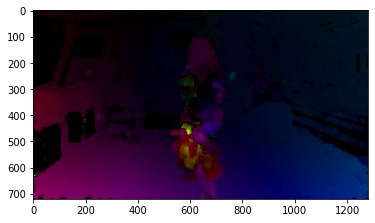

720 1280 720 1280
69
60 58 12 22


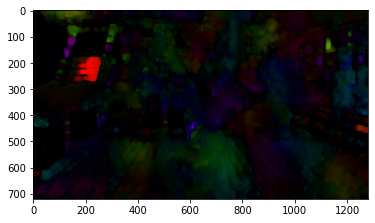

720 1280 720 1280
75
60 58 12 22


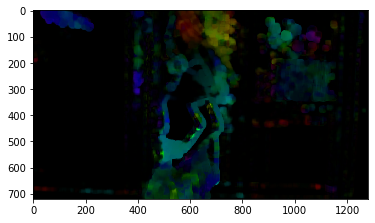

720 1280 720 1280
81
60 58 12 22


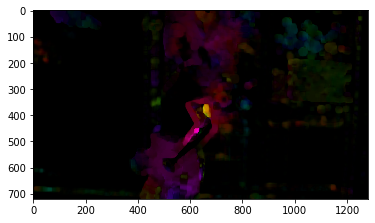

720 1280 720 1280
88
60 58 12 22


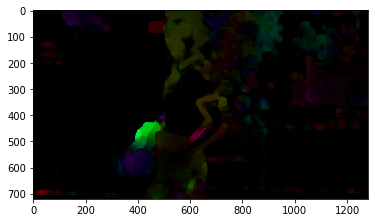

720 1280 720 1280
94
60 58 12 22


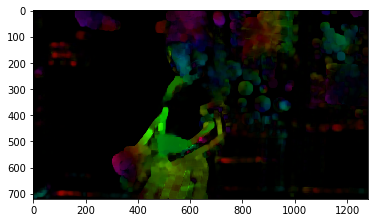

720 1280 720 1280
100
60 58 12 22


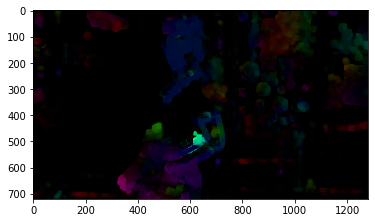

720 1280 720 1280
106
60 58 12 22


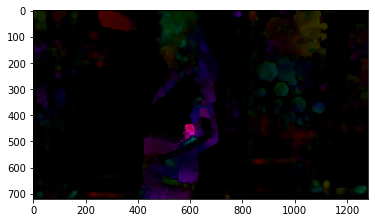

720 1280 720 1280
112
60 58 12 22


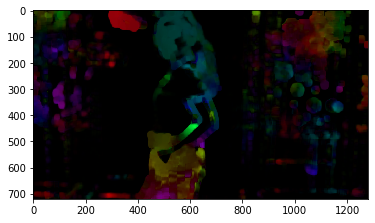

720 1280 720 1280
119
60 58 12 22


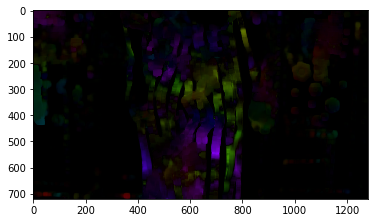

720 1280 720 1280
125
60 58 12 22


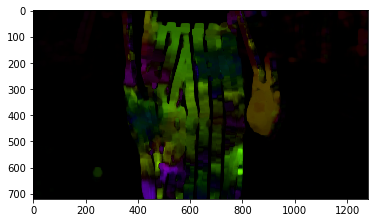

720 1280 720 1280
131
60 58 12 22


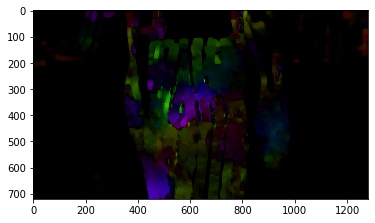

720 1280 720 1280
138
60 58 12 22


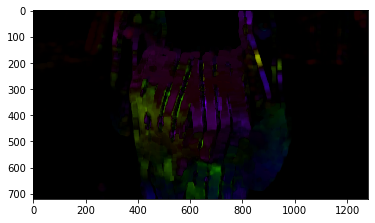

720 1280 720 1280
144
60 58 12 22


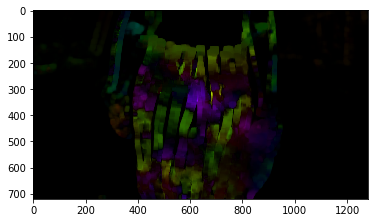

720 1280 720 1280
150
60 58 12 22


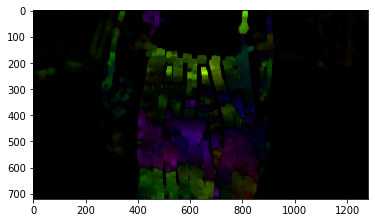

720 1280 720 1280
156
60 58 12 22


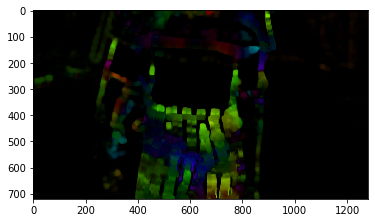

720 1280 720 1280
162
60 58 12 22


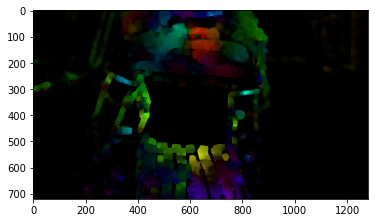

720 1280 720 1280
169
60 58 12 22


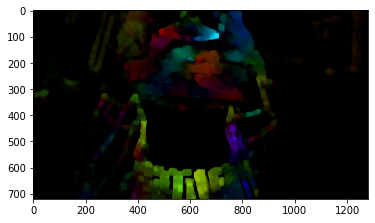

720 1280 720 1280
175
60 58 12 22


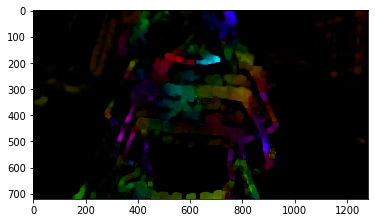

720 1280 720 1280
181
60 58 12 22


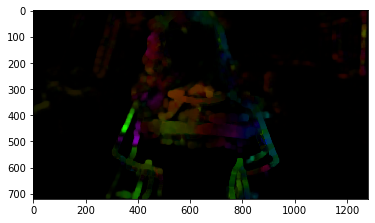

720 1280 720 1280
188
60 58 12 22


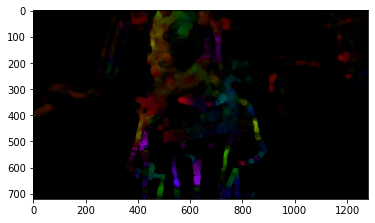

720 1280 720 1280
194
60 58 12 22


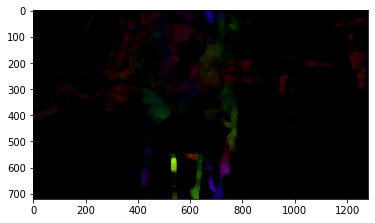

720 1280 720 1280
200
60 58 12 22


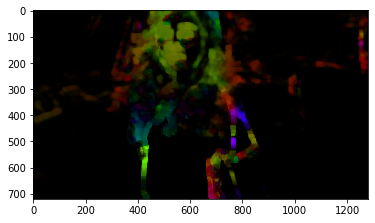

720 1280 720 1280
206
60 58 12 22


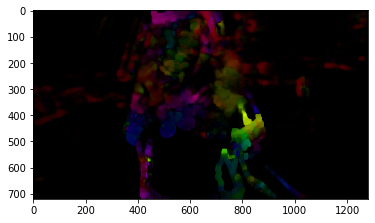

720 1280 720 1280
212
60 58 12 22


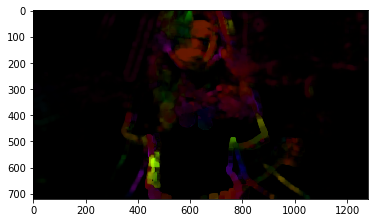

720 1280 720 1280
219
60 58 12 22


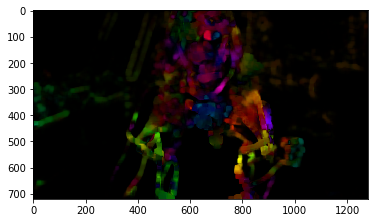

720 1280 720 1280
225
60 58 12 22


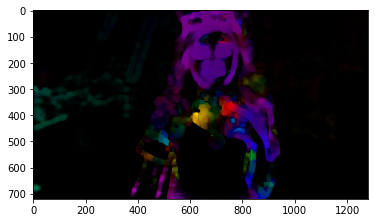

720 1280 720 1280
231
60 58 12 22


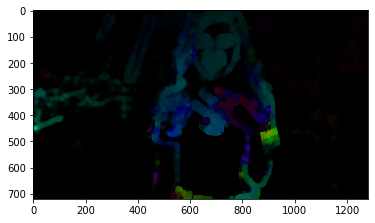

720 1280 720 1280
238
60 58 12 22


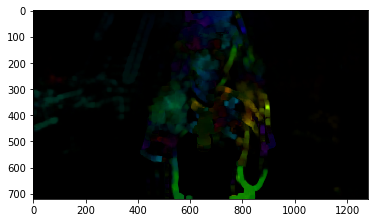

720 1280 720 1280
244
60 58 12 22


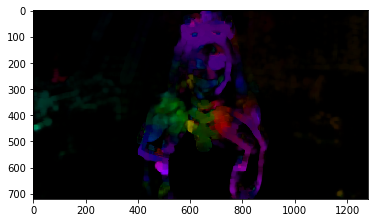

720 1280 720 1280
250
60 58 12 22


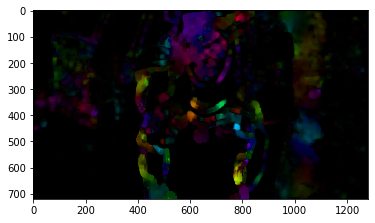

720 1280 720 1280
256
60 58 12 22


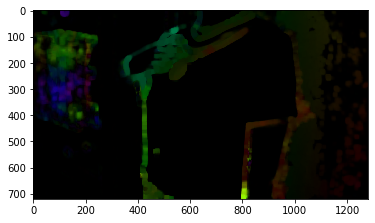

720 1280 720 1280
262
60 58 12 22


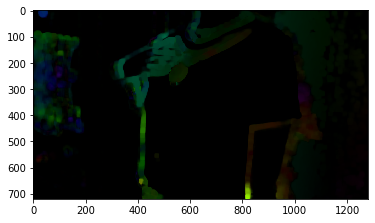

720 1280 720 1280
269
60 58 12 22


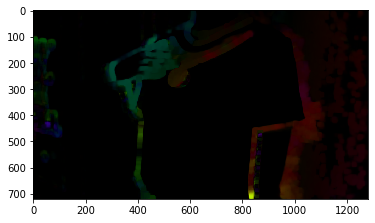

720 1280 720 1280
275
60 58 12 22


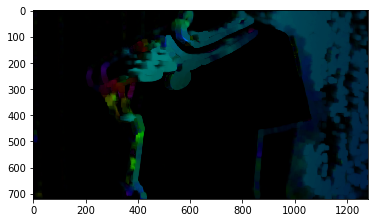

720 1280 720 1280
281
60 58 12 22


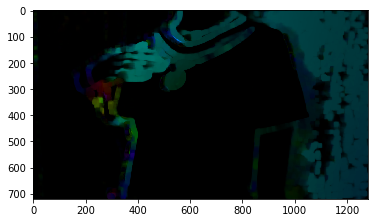

720 1280 720 1280
288
60 58 12 22


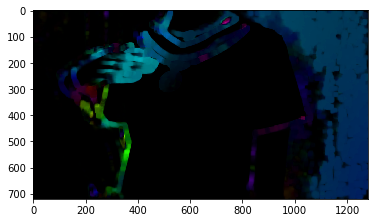

720 1280 720 1280
294
60 58 12 22


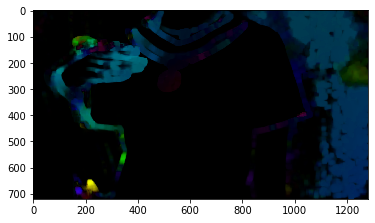

720 1280 720 1280
300
60 58 12 22


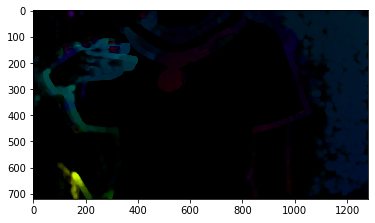

720 1280 720 1280
306
60 58 12 22


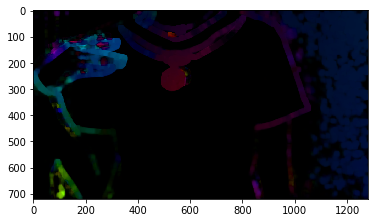

720 1280 720 1280
312
60 58 12 22


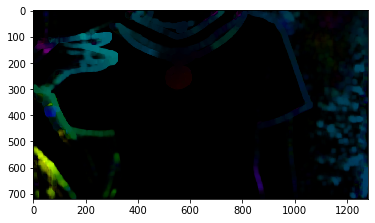

720 1280 720 1280
319
60 58 12 22


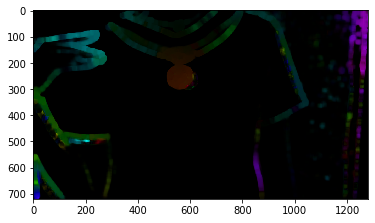

720 1280 720 1280
325
60 58 12 22


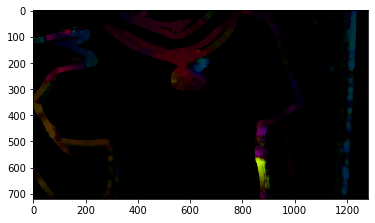

720 1280 720 1280
331
60 58 12 22


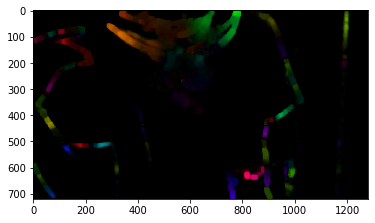

720 1280 720 1280
338
60 58 12 22


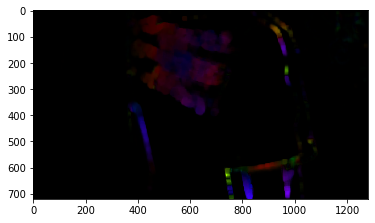

720 1280 720 1280
344
60 58 12 22


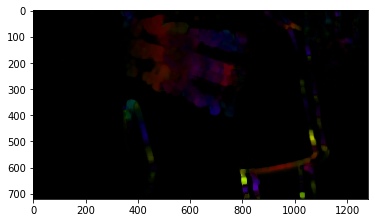

720 1280 720 1280
350
60 58 12 22


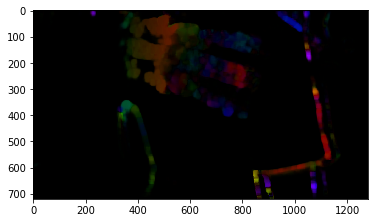

720 1280 720 1280
356
60 58 12 22


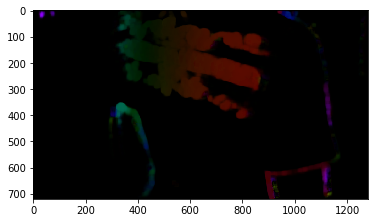

720 1280 720 1280
362
60 58 12 22


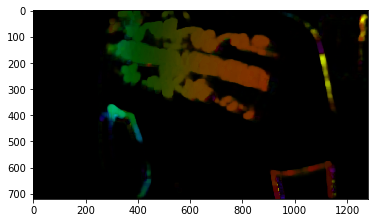

720 1280 720 1280
369
60 58 12 22


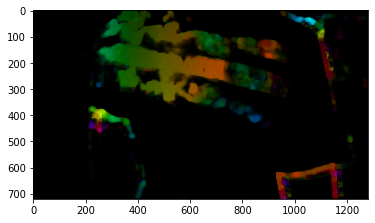

720 1280 720 1280
375
60 58 12 22


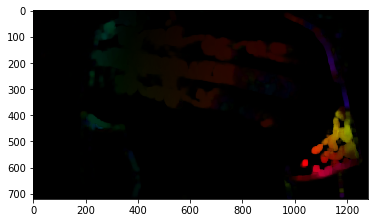

720 1280 720 1280
381
60 58 12 22


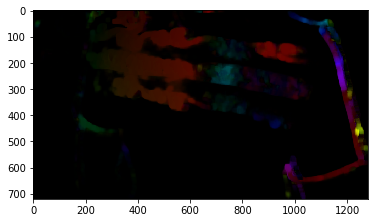

720 1280 720 1280
388
60 58 12 22


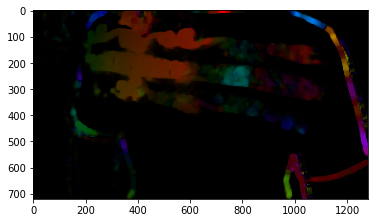

720 1280 720 1280
394
60 58 12 22


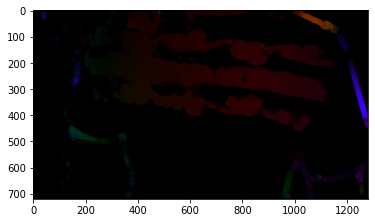

720 1280 720 1280
400
60 58 12 22


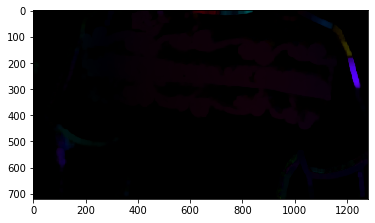

720 1280 720 1280
406
60 58 12 22


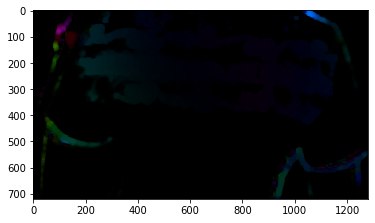

720 1280 720 1280
412
60 58 12 22


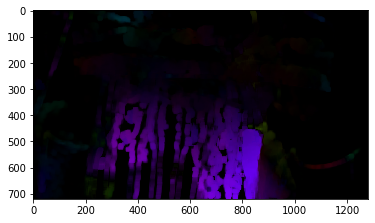

720 1280 720 1280
419
60 58 12 22


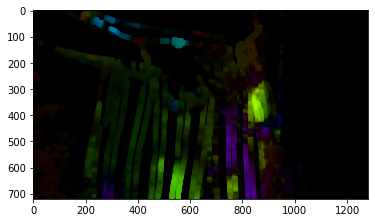

720 1280 720 1280
425
60 58 12 22


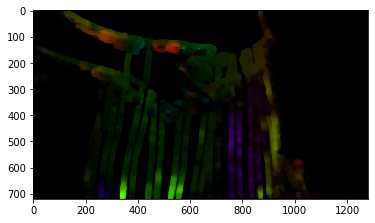

720 1280 720 1280
431
60 58 12 22


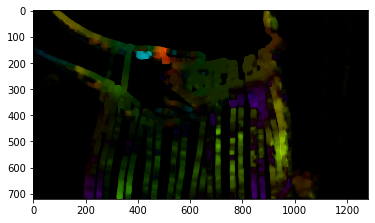

720 1280 720 1280
438
60 58 12 22


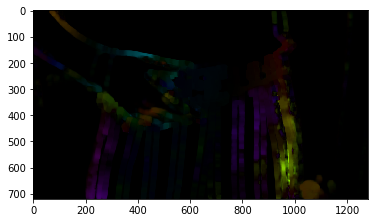

720 1280 720 1280
444
60 58 12 22


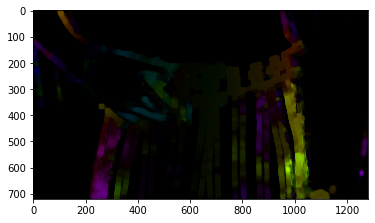

720 1280 720 1280
450
60 58 12 22


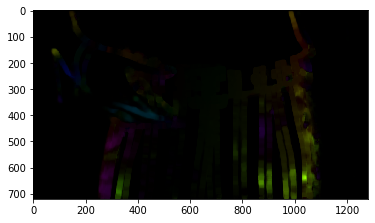

720 1280 720 1280
456
60 58 12 22


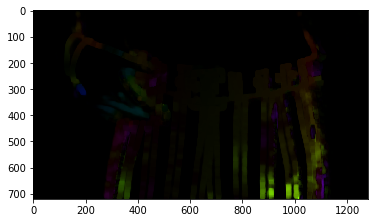

720 1280 720 1280
462
60 58 12 22


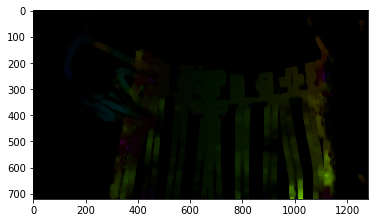

720 1280 720 1280
469
60 58 12 22


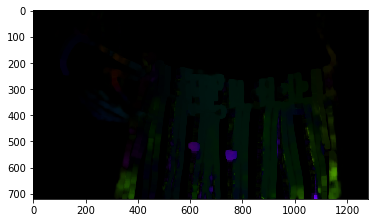

720 1280 720 1280
475
60 58 12 22


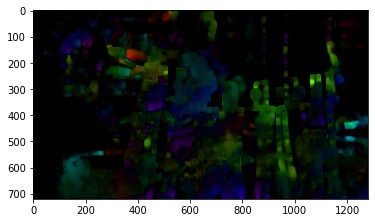

720 1280 720 1280
481
60 58 12 22


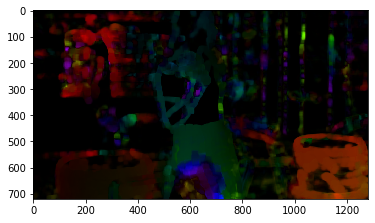

720 1280 720 1280
488
60 58 12 22


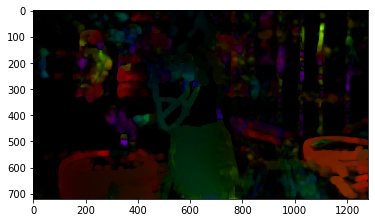

720 1280 720 1280
494
60 58 12 22


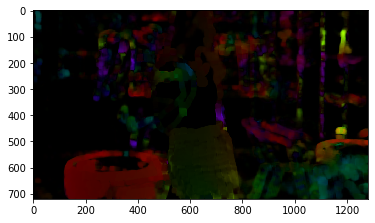

720 1280 720 1280
500
60 58 12 22


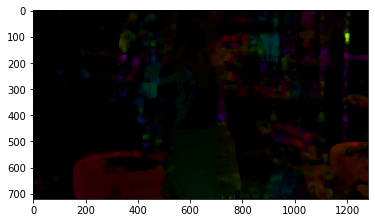

720 1280 720 1280
506
60 58 12 22


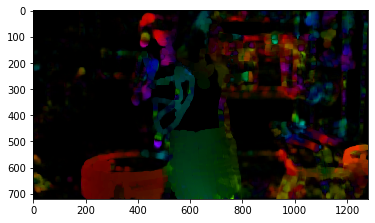

720 1280 720 1280
512
60 58 12 22


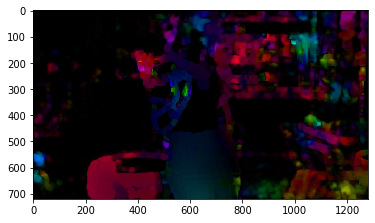

720 1280 720 1280
519
60 58 12 22


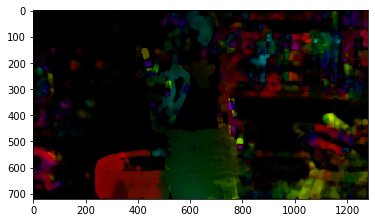

720 1280 720 1280
525
60 58 12 22


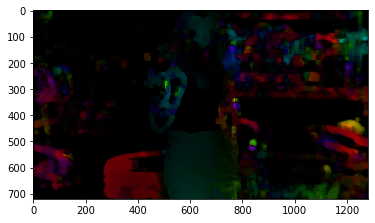

720 1280 720 1280
531
60 58 12 22


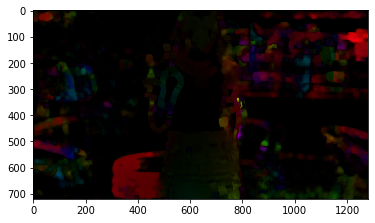

720 1280 720 1280
538
60 58 12 22


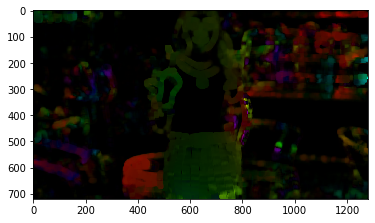

720 1280 720 1280
544
60 58 12 22


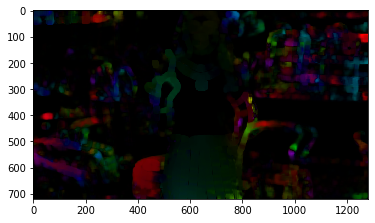

720 1280 720 1280
550
60 58 12 22


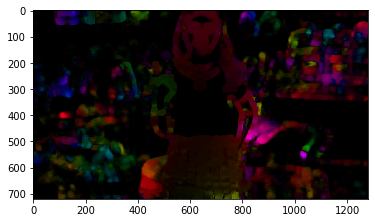

720 1280 720 1280
556
60 58 12 22


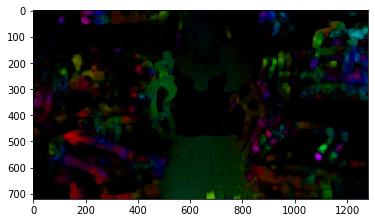

720 1280 720 1280
562


KeyboardInterrupt: 

In [11]:
next_frame_number = 0
video_frame_index = 0
cap = skvideo.io.vreader(video.path, as_grey=False)
prev_frame = None
cur_frame = None
start = time.time()
for frame_number, frame in enumerate(cap):
    if prev_frame is None:
        grey = cv2.cvtColor(frame, cv2.COLOR_RGB2GRAY)
        grey = resize_frame(grey, 0, 720)
        prev_frame = grey
        flow = np.zeros((grey.shape[0], grey.shape[1], 2))
        flow_ext = flow_extraction(flow)
        video.frames[video_frame_index].flow = flow_ext
        video_frame_index += 1
        next_frame_number = video.frames[video_frame_index].frame_number
    elif next_frame_number == frame_number:
        grey = cv2.cvtColor(frame, cv2.COLOR_RGB2GRAY)
        grey = resize_frame(grey, 0, 720)
        print(frame_number)
        cur_frame = grey
        flow = cv2.calcOpticalFlowFarneback(prev_frame, cur_frame, None, **fb_params)
        flow_ext = flow_extraction(flow)
        show_flow(flow, prev_frame, cur_frame)
#         show_flow_ext(flow_ext)
        video.frames[video_frame_index].flow = flow_ext
#         counts, bins = np.histogram(flow[..., 1], bins=5)
#         plt.hist(bins[:-1], bins, weights=counts)
#         plt.ylabel('count')
#         plt.xlabel('x')
#         plt.show()
        prev_frame = cur_frame
        video_frame_index += 1
        if video_frame_index >= len(video.frames):
            break
        next_frame_number = video.frames[video_frame_index].frame_number
end = time.time()
cost = end - start
print('Farneback time cost:', cost)
print('Frame per second:', video.frame_count / cost)

In [38]:
import os
import pickle

path = os.path.join("videos/0/", 'videos-v{}.pkl'.format(0))
f = open(path, 'wb')
pickle.dump(video, f)
f.close()

0


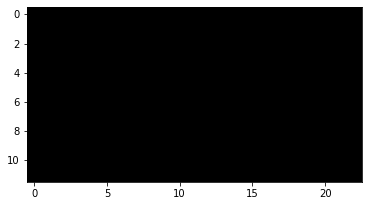

6


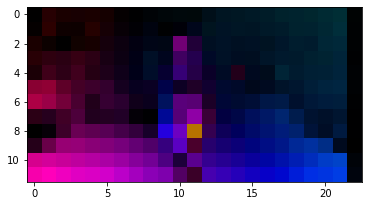

12


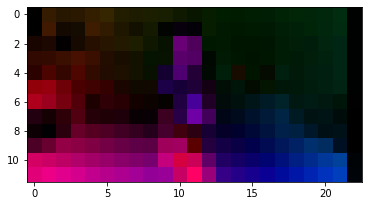

19


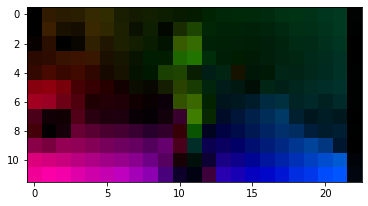

25


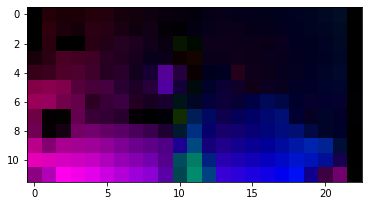

31


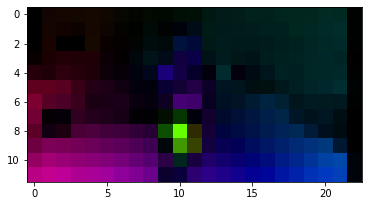

38


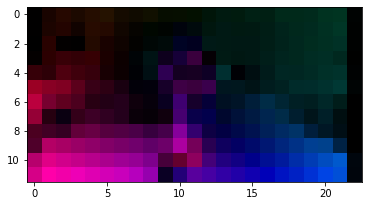

44


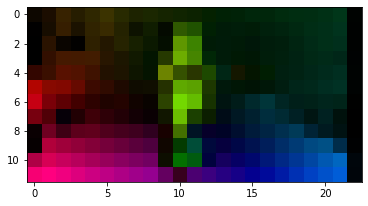

50


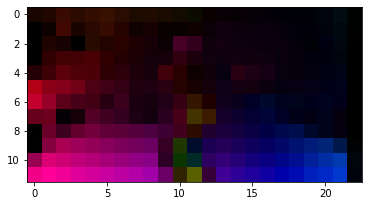

56


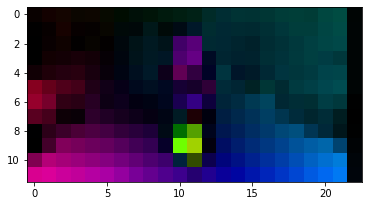

62


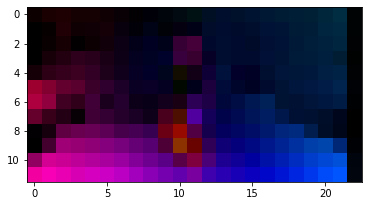

69


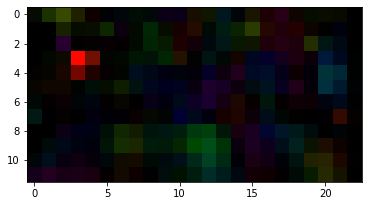

75


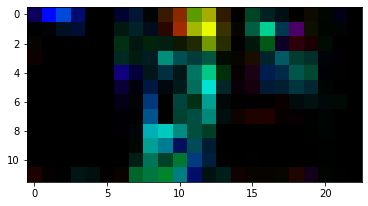

81


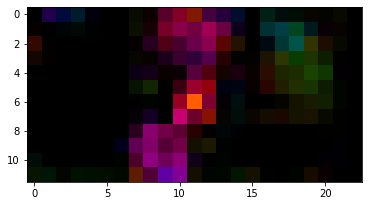

88


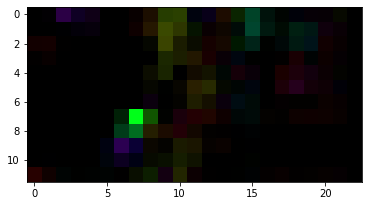

94


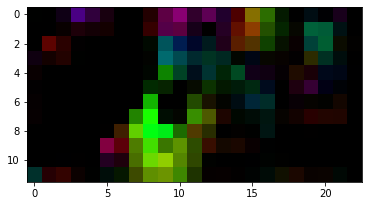

100


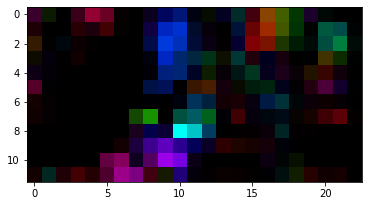

106


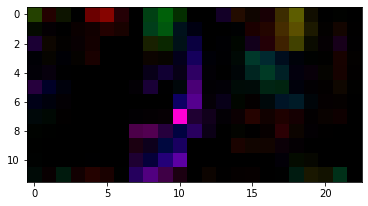

112


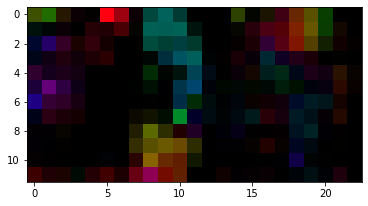

119


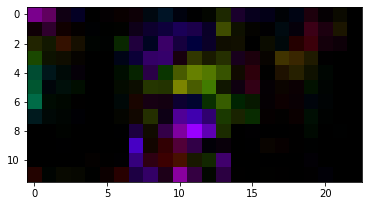

125


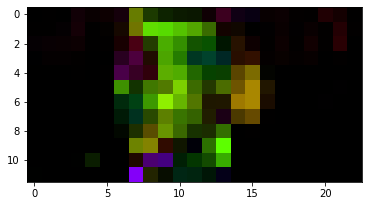

131


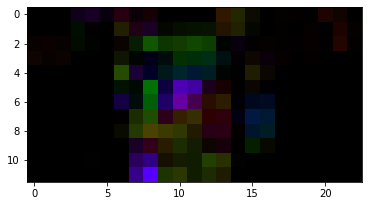

138


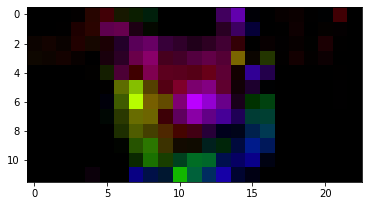

144


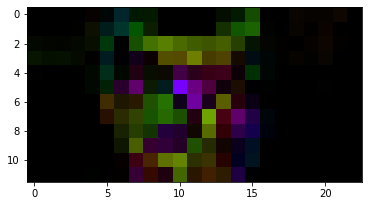

150


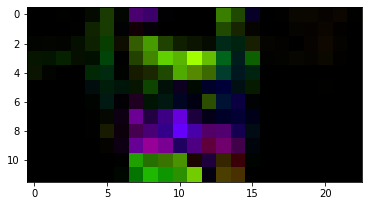

156


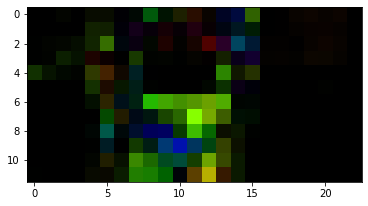

162


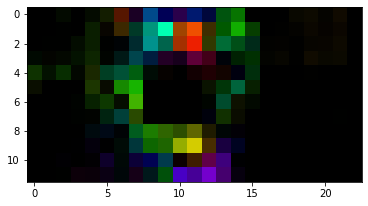

169


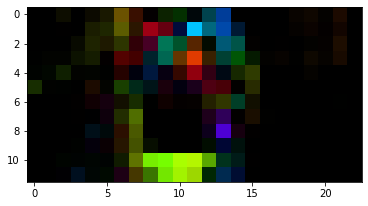

175


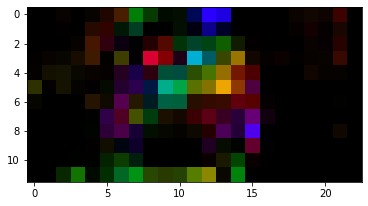

181


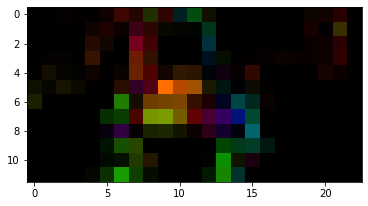

188


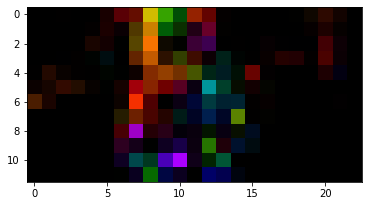

194


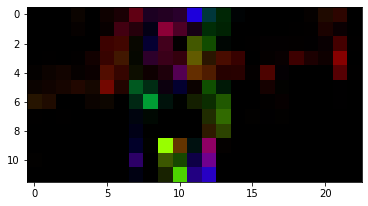

200


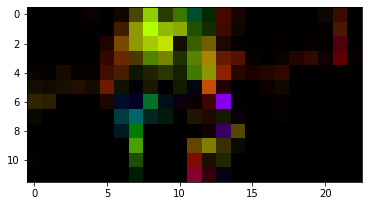

206


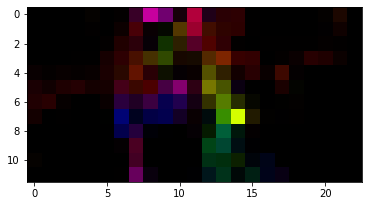

212


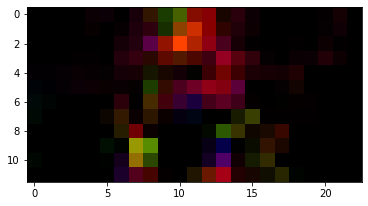

219


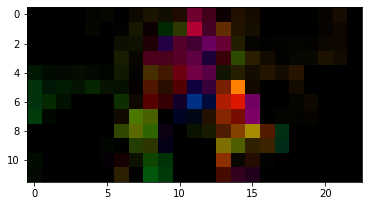

225


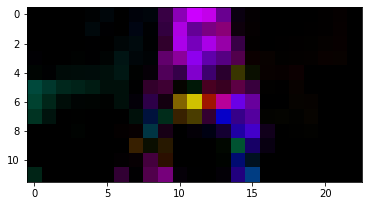

231


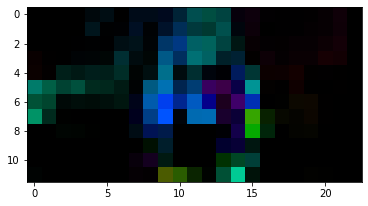

238


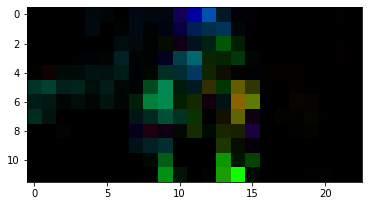

244


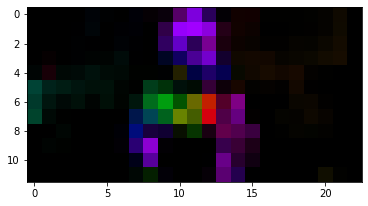

250


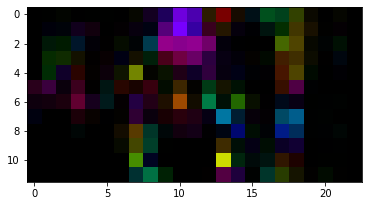

256


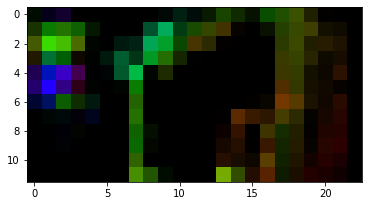

262


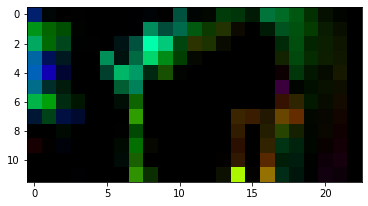

269


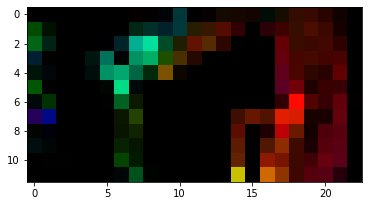

275


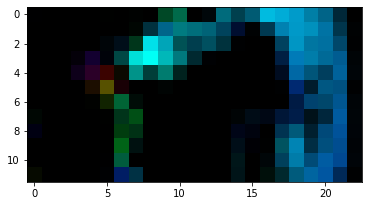

281


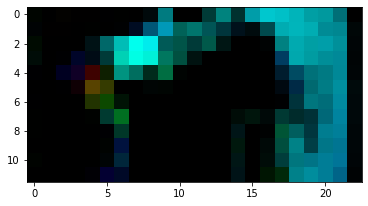

288


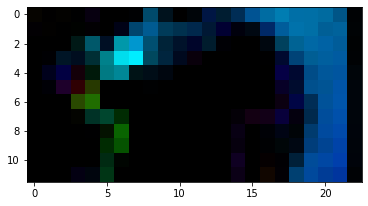

294


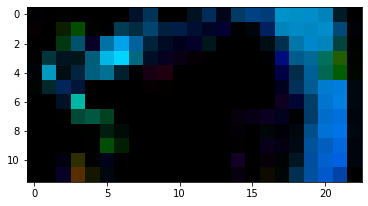

300


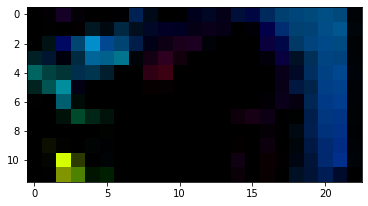

306


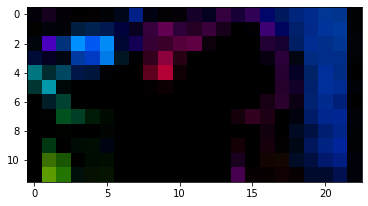

312


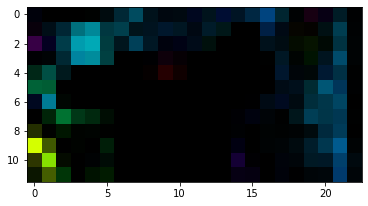

319


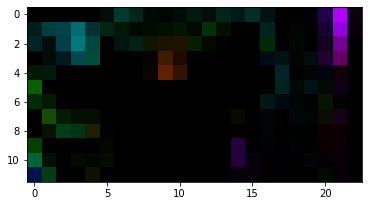

325


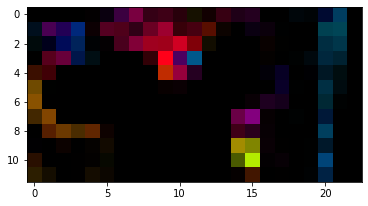

331


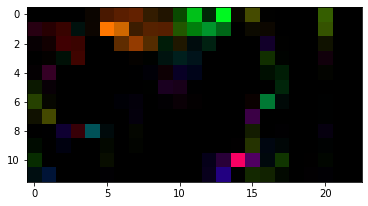

338


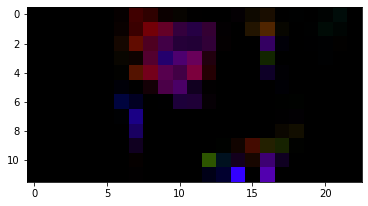

344


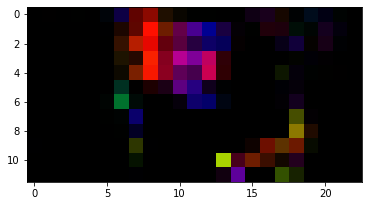

350


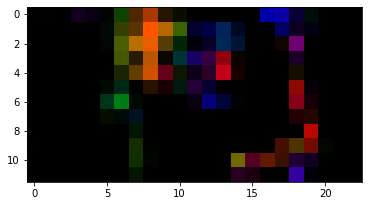

356


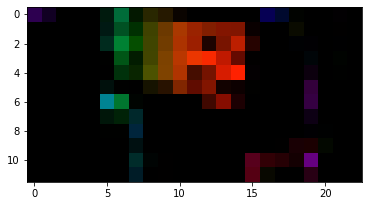

362


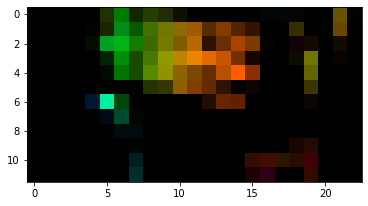

369


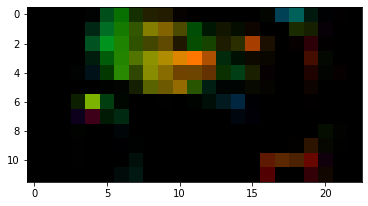

375


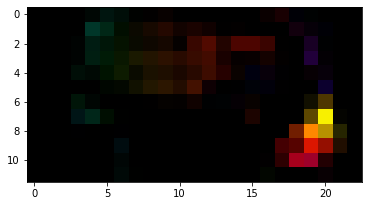

381


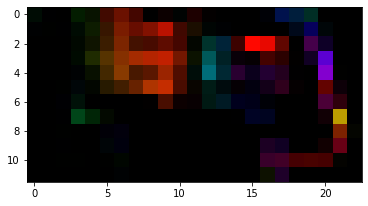

388


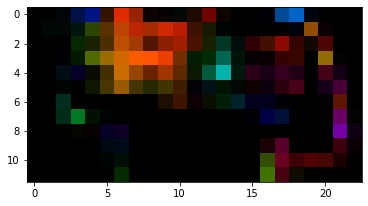

394


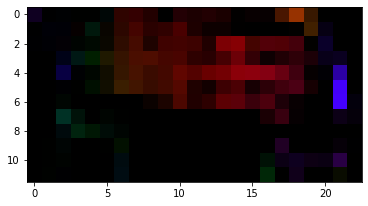

400


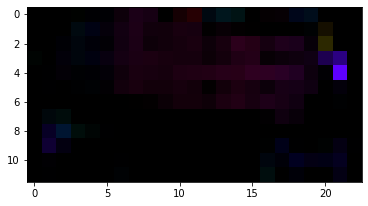

406


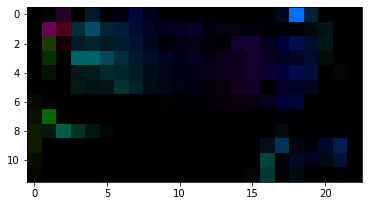

412


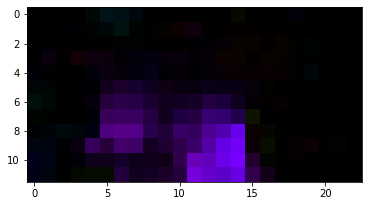

419


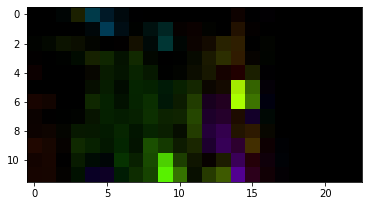

425


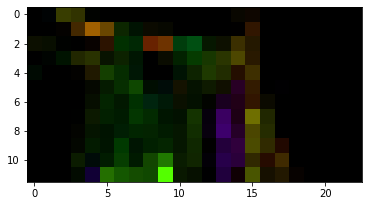

431


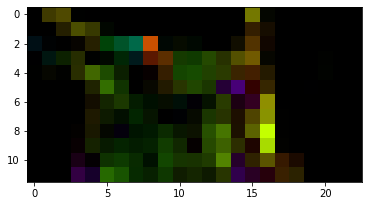

438


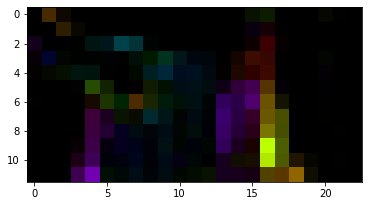

444


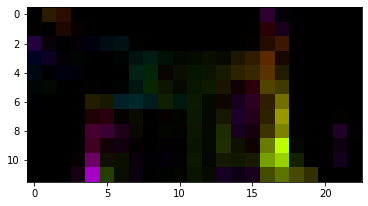

450


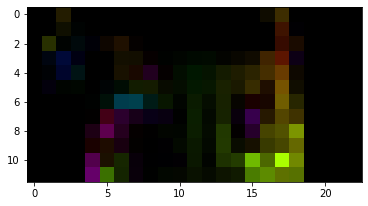

456


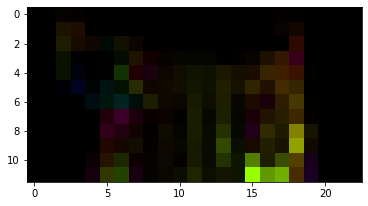

462


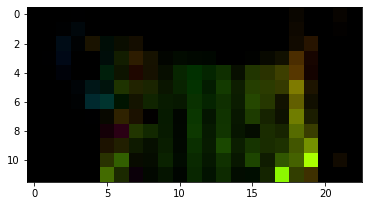

469


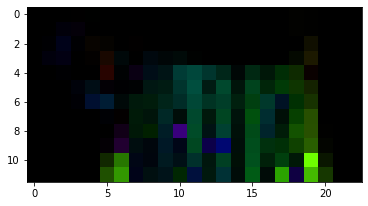

475


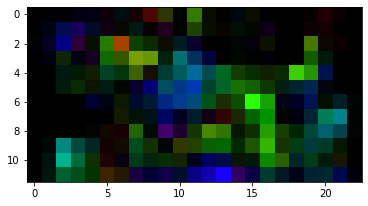

481


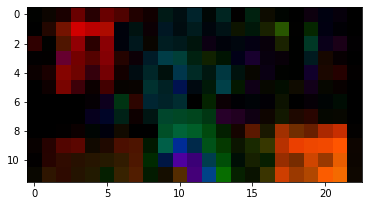

488


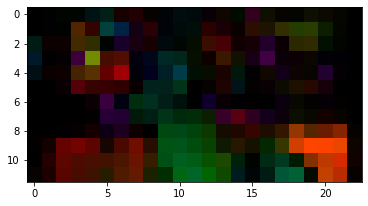

494


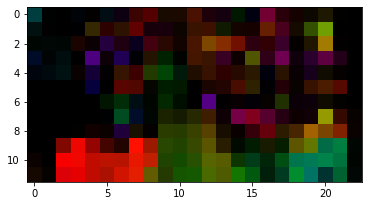

500


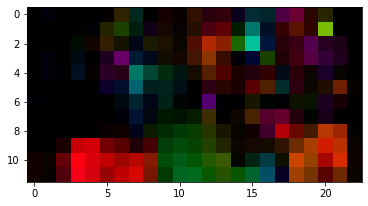

506


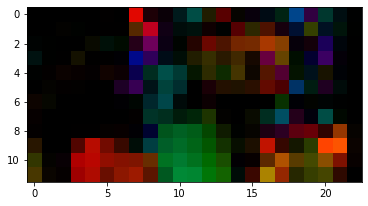

512


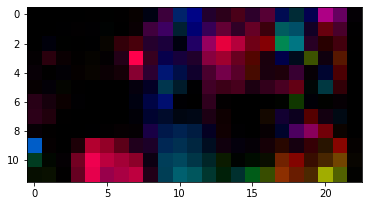

519


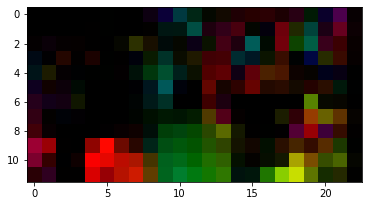

525


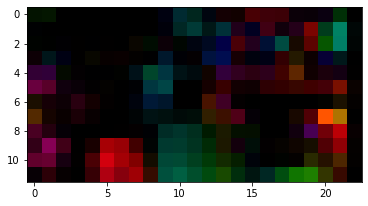

531


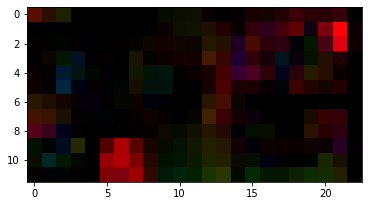

538


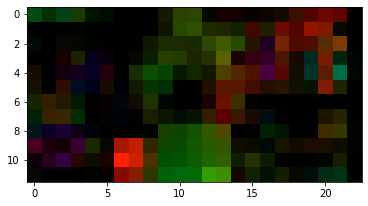

544


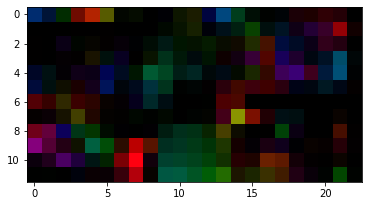

550


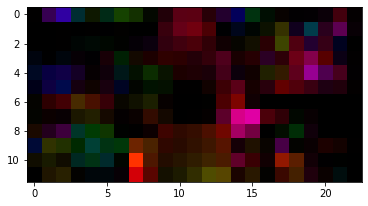

556


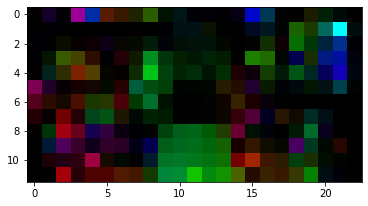

562


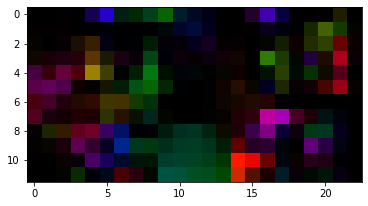

569


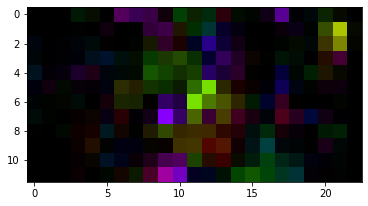

575


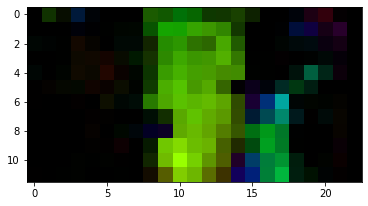

581


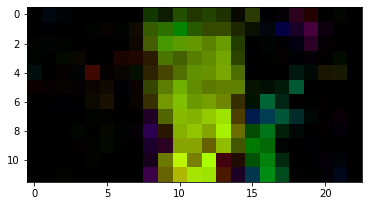

588


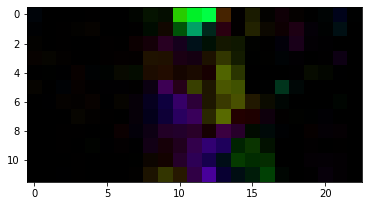

594


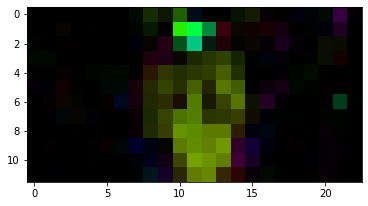

600


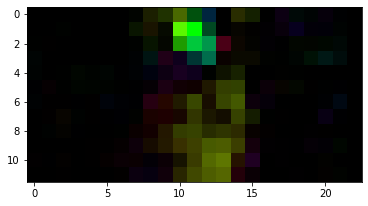

606


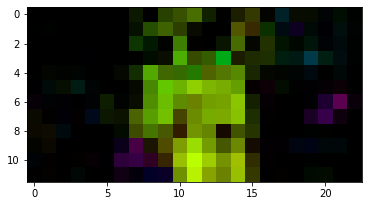

612


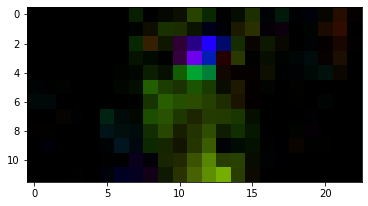

619


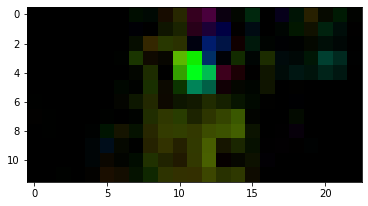

625


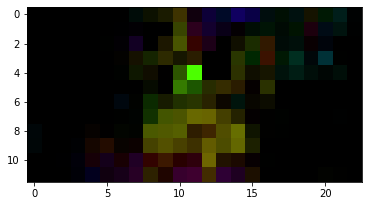

631


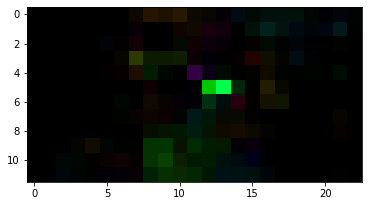

638


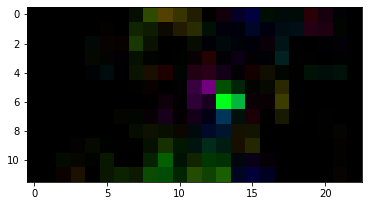

644


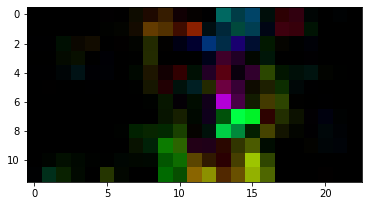

650


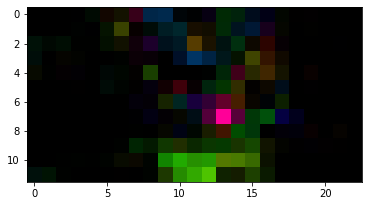

656


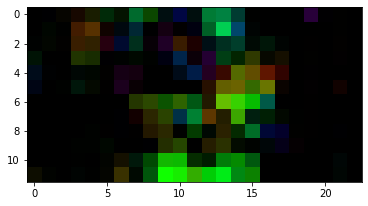

662


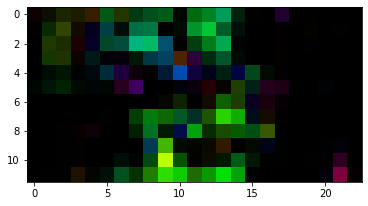

669


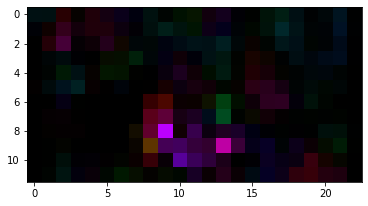

675


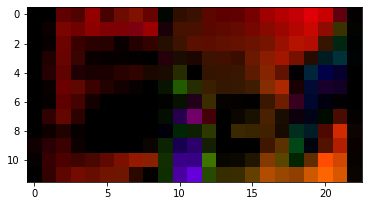

681


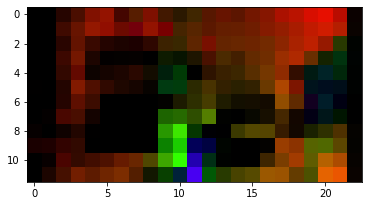

688


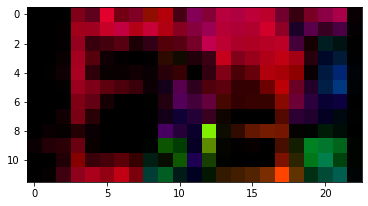

694


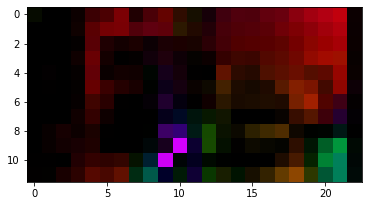

700


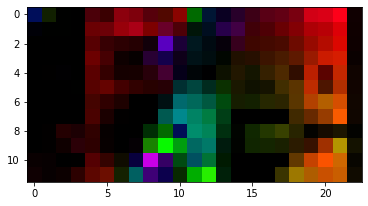

706


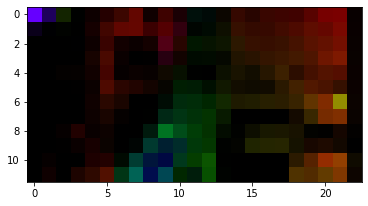

712


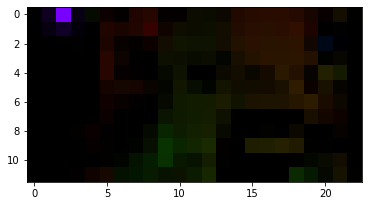

719


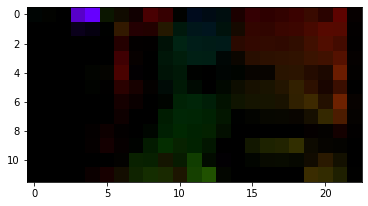

725


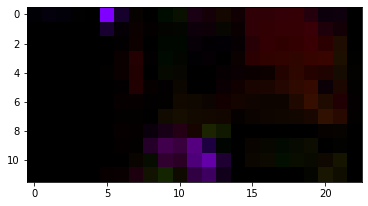

731


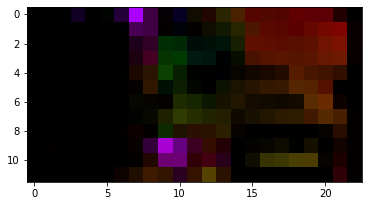

738


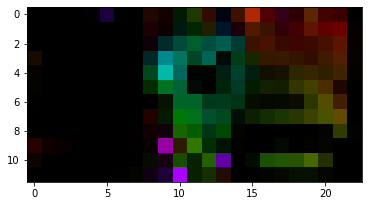

744


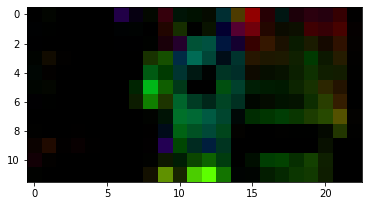

750


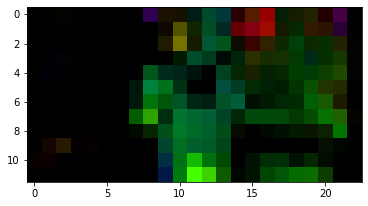

756


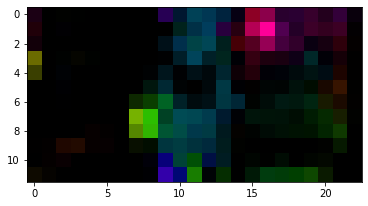

762


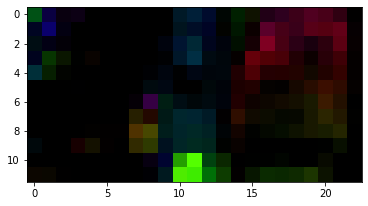

769


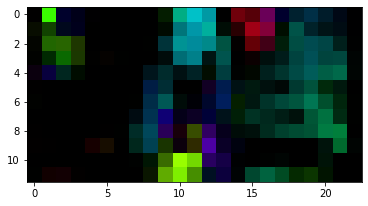

775


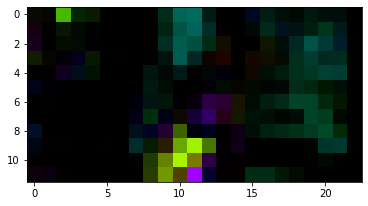

781


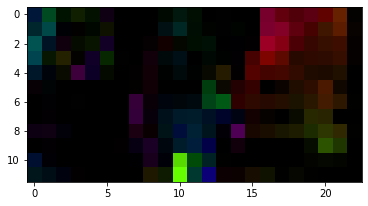

788


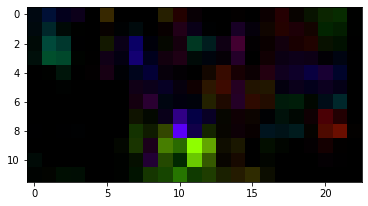

794


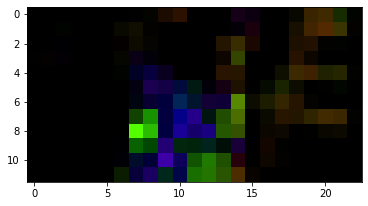

800


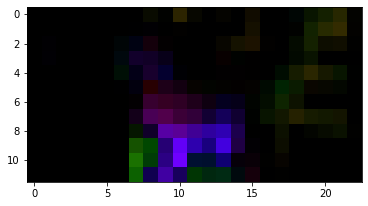

806


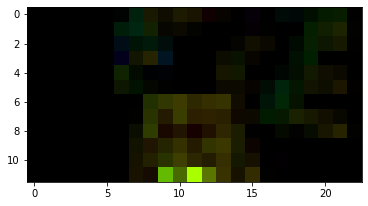

812


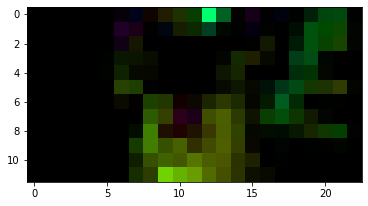

819


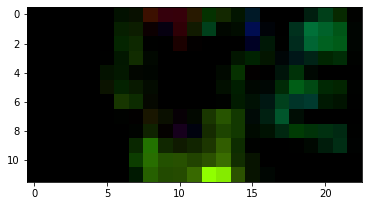

825


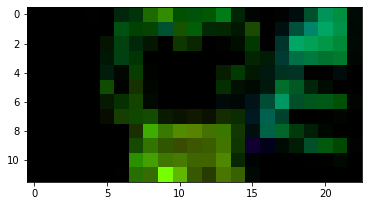

831


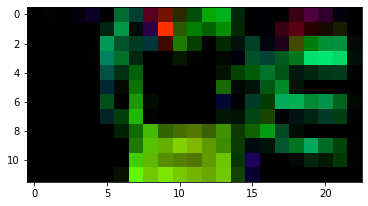

838


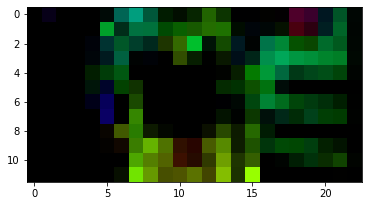

844


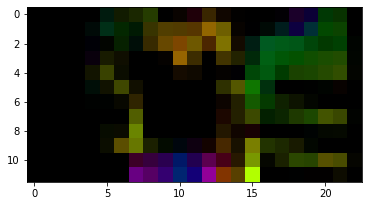

850


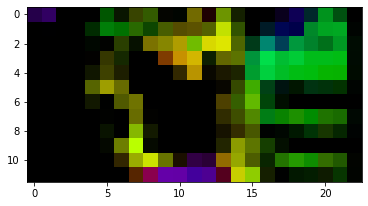

856


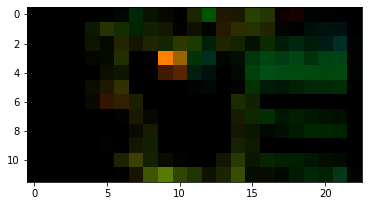

862


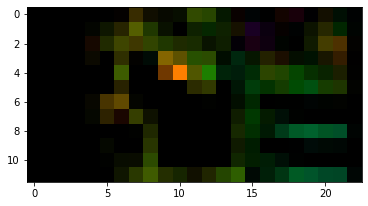

869


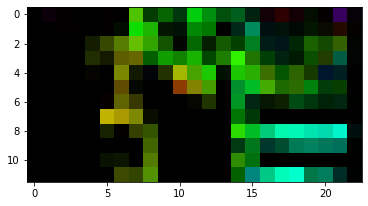

875


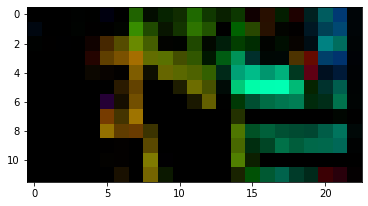

881


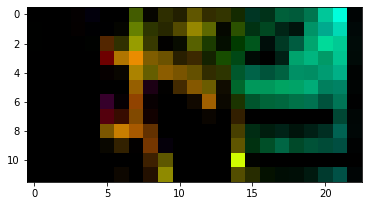

888


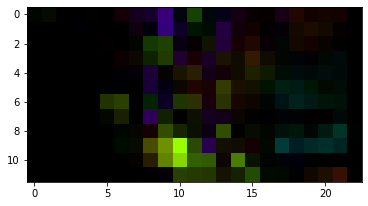

894


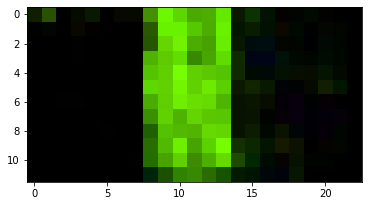

900


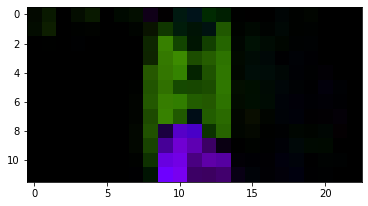

906


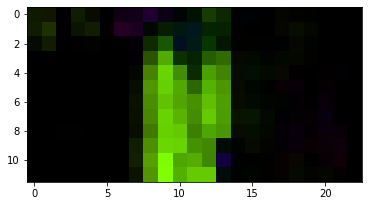

912


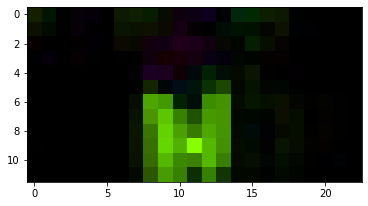

919


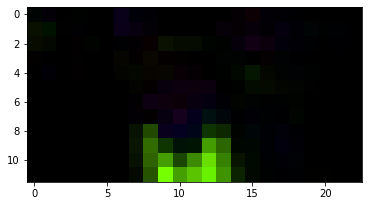

925


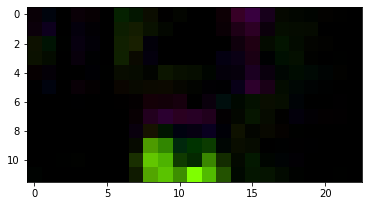

931


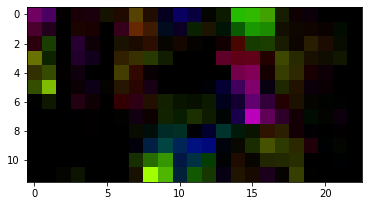

938


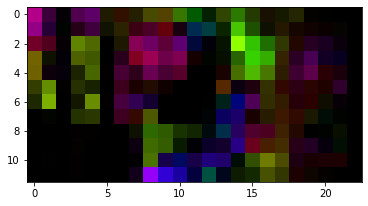

944


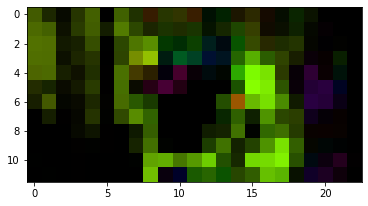

950


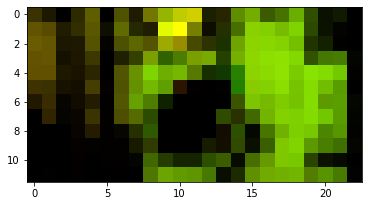

956


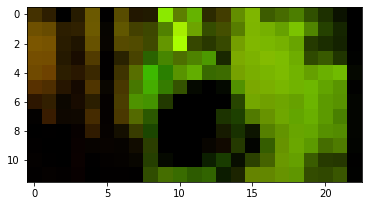

962


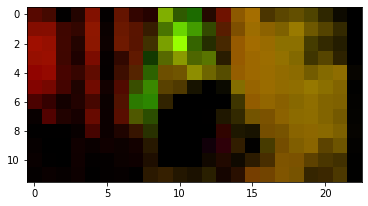

969


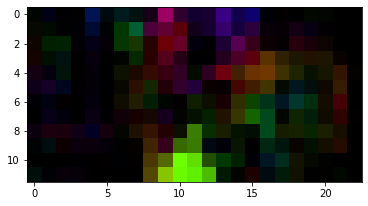

975


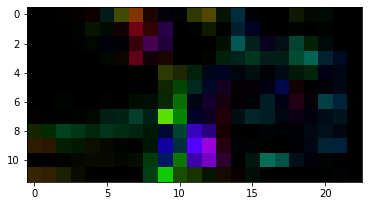

981


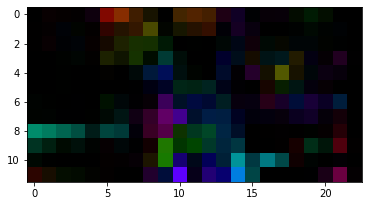

988


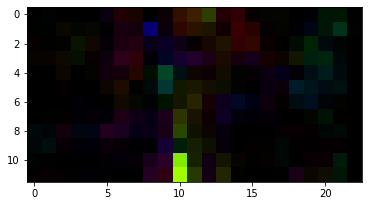

994


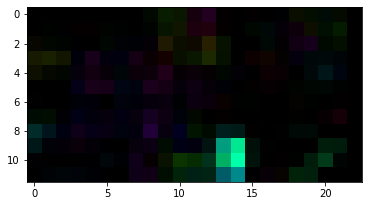

1000


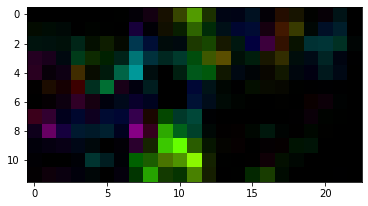

1006


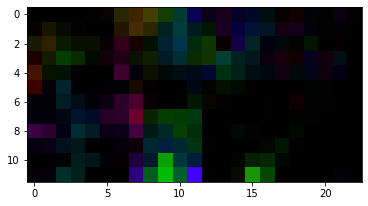

1012


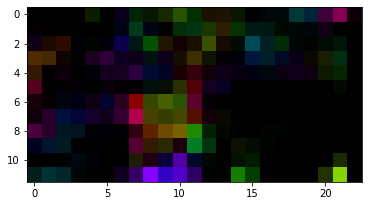

1019


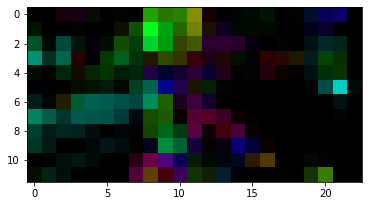

1025


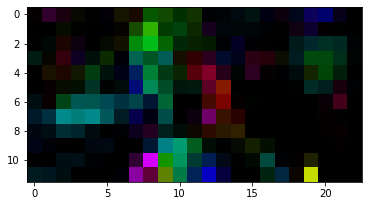

1031


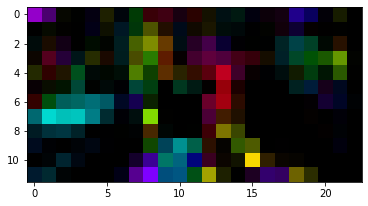

1038


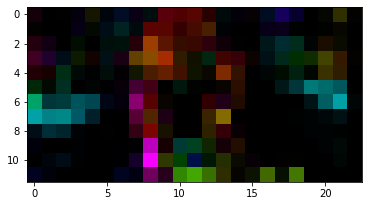

1044


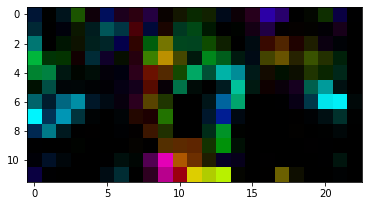

1050


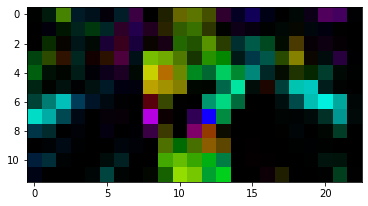

1056


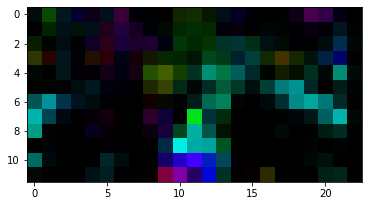

1062


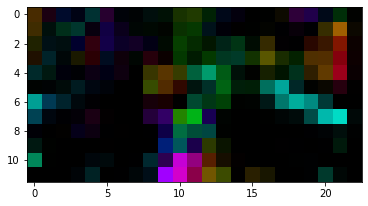

1069


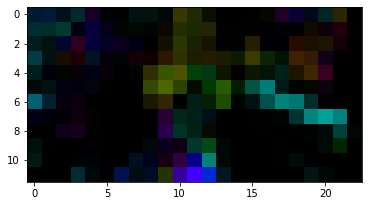

1075


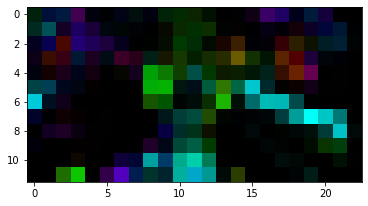

1081


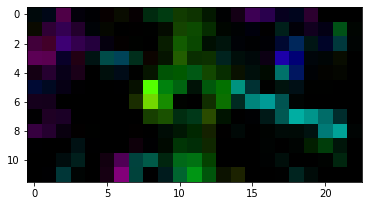

1088


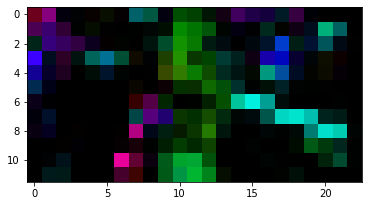

1094


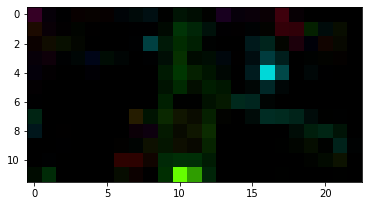

In [39]:
with open(path, 'rb') as f:
    video_load = pickle.load(f)
    for frame in video_load.frames:
        print(frame.frame_number)
        show_flow_ext(frame.flow)